In [1]:
import pandas, numpy
import scipy, scipy.stats

import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':20})

# 0. user-defined variables

In [2]:
data_file ='/home/adrian/projects/HUVECs/data/csv/HUVEC_AllMeasurements_Summary_21.12.2020.Extracellular_compiled.csv'

# 1. read data

In [3]:
df = pandas.read_csv(data_file, header = 1)
df.head()

,Sample ID,Experiment,Treatment,Timepoint (h),Cell numbers,Na+,Cl-,Glucose,Lactate,Glutamine,...,Aspartic ac,MS Glutamin,MS Glutamic ac,Ornithine,Lysine,Citrulline,Glycin NL,XLeu/Ile/Hopro,Methylhistidin,Phenylalanine
0,NaN,NaN,NaN,NaN,NaN,mM,mM,uM,uM,uM,...,uM,uM,uM,uM,uM,uM,uM,uM,uM,uM
1,1,2,0.0,0.0,480000,121,111,5800,300,2061.07033855966,...,100.16,1422.455,1577.685,31.58,1509.19,3.705,633.275,842.7,2.165,156.8
2,2,2,0.5,0.0,480000,120,110,5900,400,13548.1023587988,...,114.53,1576.49,1738.505,34.935,1673.355,4.86,737.03,929.685,2.04,171.59
3,3,2,5.0,0.0,480000,121,111,5900,300,1379.5430799426,...,104.79,1597.895,1618.63,31.085,1770.46,4.49,746.875,926.1,2.375,166.795
4,4,2,50.0,0.0,480000,120,112,6200,700,1459.60347346998,...,103.17,1624.73,1547.505,29.82,1858.57,4.695,691.83,871.235,1.72,160.115


# 2. format data

## 2.1. select appropriate rows

In [4]:
#df.drop([0], inplace=True)
#df.drop(list(range(29, 85)), inplace=True)
#df.drop(list(range(141, 173)), inplace=True)
#df
working_values = list(range(1, 28+1)) + list(range(85, 140+1))
subdf = df.iloc[working_values]
subdf.drop(list(range(110, 116+1)), inplace=True) # loosing measurements because unfortunately we don't have cell numbers
subdf

/home/adrian/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Sample ID,Experiment,Treatment,Timepoint (h),Cell numbers,Na+,Cl-,Glucose,Lactate,Glutamine,...,Aspartic ac,MS Glutamin,MS Glutamic ac,Ornithine,Lysine,Citrulline,Glycin NL,XLeu/Ile/Hopro,Methylhistidin,Phenylalanine
1,1,2,0.0,0.0,480000,121,111,5800,300,2061.07033855966,...,100.16,1422.455,1577.685,31.58,1509.19,3.705,633.275,842.7,2.165,156.8
2,2,2,0.5,0.0,480000,120,110,5900,400,13548.1023587988,...,114.53,1576.49,1738.505,34.935,1673.355,4.86,737.03,929.685,2.04,171.59
3,3,2,5.0,0.0,480000,121,111,5900,300,1379.5430799426,...,104.79,1597.895,1618.63,31.085,1770.46,4.49,746.875,926.1,2.375,166.795
4,4,2,50.0,0.0,480000,120,112,6200,700,1459.60347346998,...,103.17,1624.73,1547.505,29.82,1858.57,4.695,691.83,871.235,1.72,160.115
5,5,2,0.0,4.0,560000,122,114,4700,2900,3979.60139159998,...,103.075,1425.89,1535.835,34.91,1628.795,4.05,641.75,813.275,1.86,146.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,136,7,5.0,24.0,457000,-,-,1700,7200,2406.00043263861,...,128.66,2015.56,2224.84,43.745,1965.8,4.805,611.79,909.155,3.55,164.4
137,137,7,5.0,24.0,457000,-,-,1700,6800,362.915267873023,...,115.65,1566.305,2015.03,38.055,1369.025,5.145,501.93,802.22,3.05,136.71
138,138,7,50.0,24.0,1150000,-,-,1600,7100,1737.0066637892,...,119.39,1670.44,1891.01,32.9,1343.17,3.635,433.355,739.095,3.18,122.25
139,139,7,50.0,24.0,1150000,-,-,1900,6700,1707.92920619644,...,74.36,1162.79,1236.815,24.03,999.3,2.455,325.525,540.76,2.42,88.47


In [5]:
pandas.set_option("display.max_rows", 200, "display.max_columns", 20)
print(subdf)

    Sample ID  Experiment  Treatment  Timepoint (h) Cell numbers  Na+  Cl-  \
1            1          2        0.0            0.0       480000  121  111   
2            2          2        0.5            0.0       480000  120  110   
3            3          2        5.0            0.0       480000  121  111   
4            4          2       50.0            0.0       480000  120  112   
5            5          2        0.0            4.0       560000  122  114   
6            6          2        0.0            4.0       560000  119  111   
7            7          2        0.0            4.0       560000  124  117   
8            8          2        0.5            4.0       510000  124  117   
9            9          2        0.5            4.0       510000  123  116   
10          10          2        0.5            4.0       510000  122  109   
11          11          2        5.0            4.0       380000  127  115   
12          12          2        5.0            4.0       380000

## 2.2. select appropriate columns

In [6]:
selected_columns = [0, 1, 2, 3, 4] + list(range(12,33))

wdf = subdf.iloc[:, selected_columns]
wdf

,Sample ID,Experiment,Treatment,Timepoint (h),Cell numbers,Glycine,Serine,Threonine,Arg,Pro,...,Aspartic ac,MS Glutamin,MS Glutamic ac,Ornithine,Lysine,Citrulline,Glycin NL,XLeu/Ile/Hopro,Methylhistidin,Phenylalanine
1,1,2,0.0,0.0,480000,33.44,24.94,8.22,218.21,186.415,...,100.16,1422.455,1577.685,31.58,1509.19,3.705,633.275,842.7,2.165,156.8
2,2,2,0.5,0.0,480000,36.49,24.705,8.42,228.7,214.925,...,114.53,1576.49,1738.505,34.935,1673.355,4.86,737.03,929.685,2.04,171.59
3,3,2,5.0,0.0,480000,40.915,22.215,7.565,234.53,221.36,...,104.79,1597.895,1618.63,31.085,1770.46,4.49,746.875,926.1,2.375,166.795
4,4,2,50.0,0.0,480000,16.79,15.99,4.56,209.98,209.695,...,103.17,1624.73,1547.505,29.82,1858.57,4.695,691.83,871.235,1.72,160.115
5,5,2,0.0,4.0,560000,44.545,20.79,6.81,193.885,236.305,...,103.075,1425.89,1535.835,34.91,1628.795,4.05,641.75,813.275,1.86,146.15
6,6,2,0.0,4.0,560000,51.525,25.66,7.97,233.28,258.005,...,121.525,1666.37,2004.425,45.85,1751.87,4.81,780.545,986.55,2.35,175.31
7,7,2,0.0,4.0,560000,50,23.62,7.2,234.51,240.17,...,110.37,1491.13,2020.5,38.88,1492.69,4.4,692.42,951.77,2.49,173.71
8,8,2,0.5,4.0,510000,47.05,21.73,6.83,220.035,247.065,...,106.005,1529.65,1906.215,33.89,1646.07,4.2,798.1,887.32,2.345,160.27
9,9,2,0.5,4.0,510000,49.715,23.02,6.65,221.825,271.55,...,118.92,1520.89,1865.25,36.245,1712.84,5.38,781.41,904.875,2.56,159.435
10,10,2,0.5,4.0,510000,45.83,21.8,6.46,198.945,252.505,...,103.545,1372.925,1688.565,39.695,1491.005,4.12,642.945,859.095,2.295,156.71


# 3. plot

8 very significant 142.9090584560464 70.94613526570048 0.007847147603017293


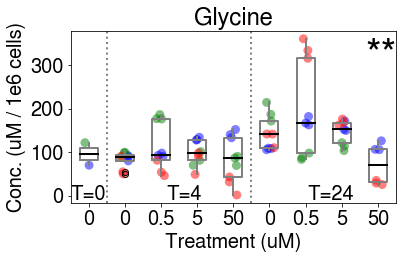

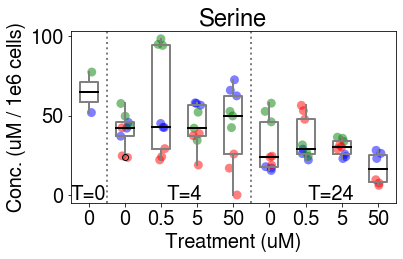

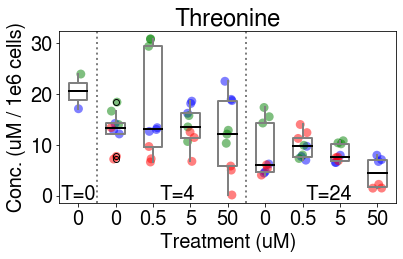

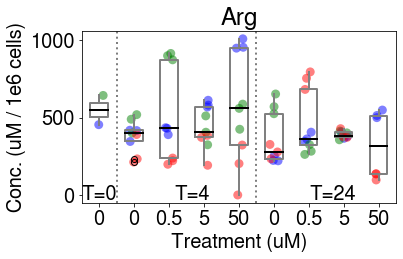

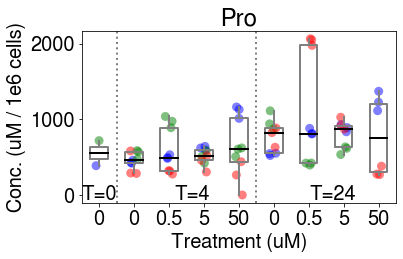

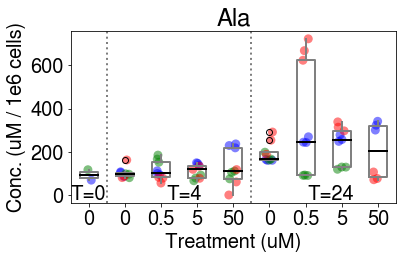

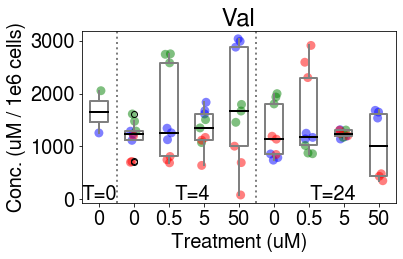

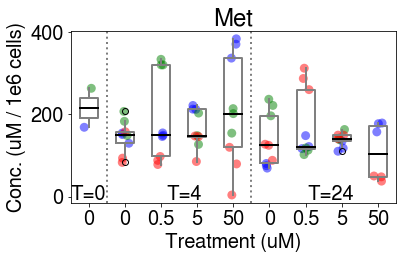

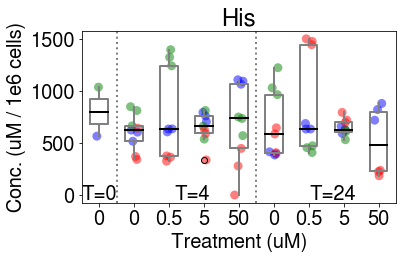

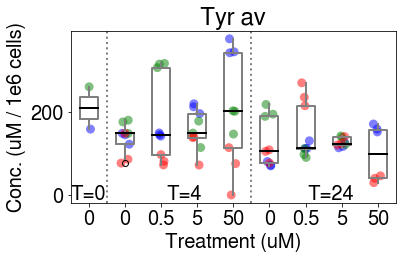

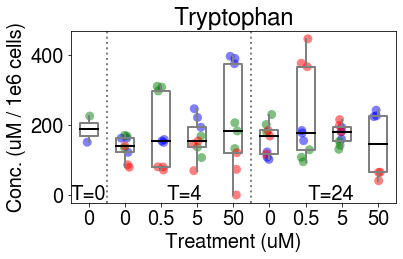

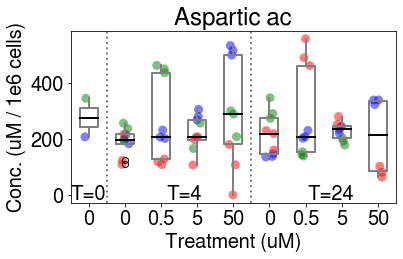

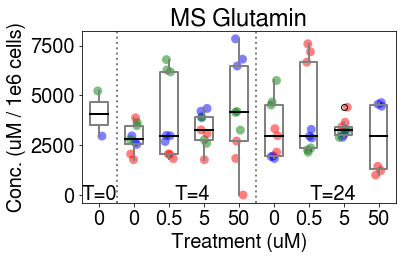

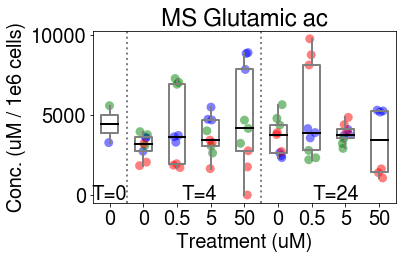

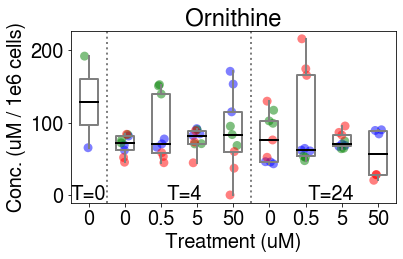

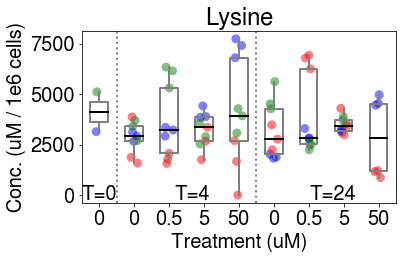

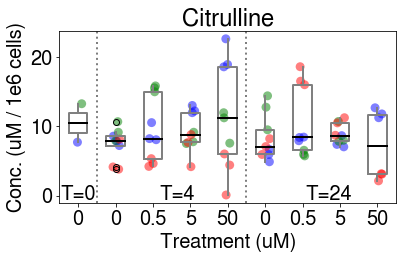

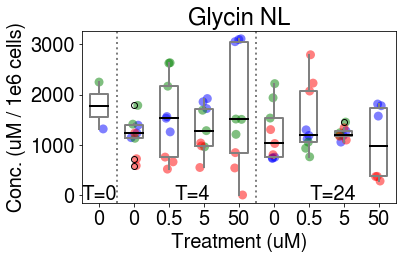

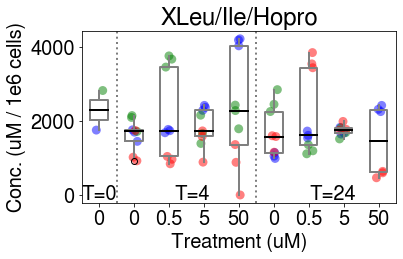

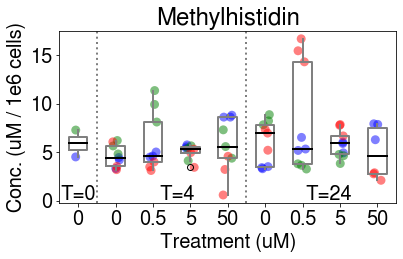

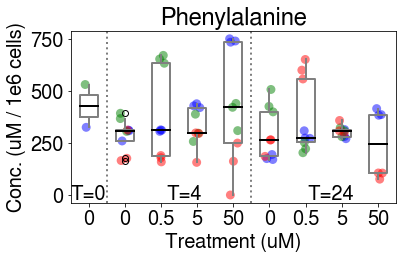

In [7]:
for metab in wdf.columns[5:]:
    
    loc_zero_zero = wdf[(wdf['Treatment'] == 0) & (wdf['Timepoint (h)'] == 0)][metab].astype(float).values
    loc_four_zero = wdf[(wdf['Treatment'] == 0) & (wdf['Timepoint (h)'] == 4)][metab].astype(float).values
    loc_four_half = wdf[(wdf['Treatment'] == 0.5) & (wdf['Timepoint (h)'] == 4)][metab].astype(float).values
    loc_four_five = wdf[(wdf['Treatment'] == 5) & (wdf['Timepoint (h)'] == 4)][metab].astype(float).values
    loc_four_fifty = wdf[(wdf['Treatment'] == 50) & (wdf['Timepoint (h)'] == 4)][metab].astype(float).values
    loc_twentyfour_zero = wdf[(wdf['Treatment'] == 0) & (wdf['Timepoint (h)'] == 24)][metab].astype(float).values
    loc_twentyfour_half = wdf[(wdf['Treatment'] == 0.5) & (wdf['Timepoint (h)'] == 24)][metab].astype(float).values
    loc_twentyfour_five = wdf[(wdf['Treatment'] == 5) & (wdf['Timepoint (h)'] == 24)][metab].astype(float).values
    loc_twentyfour_fifty = wdf[(wdf['Treatment'] == 50) & (wdf['Timepoint (h)'] == 24)][metab].astype(float).values
    
    cf1 = 1e6/wdf[(wdf['Treatment'] == 0) & (wdf['Timepoint (h)'] == 0)]['Cell numbers'].astype(float).values
    cf2 = 1e6/wdf[(wdf['Treatment'] == 0) & (wdf['Timepoint (h)'] == 4)]['Cell numbers'].astype(float).values
    cf3 = 1e6/wdf[(wdf['Treatment'] == 0.5) & (wdf['Timepoint (h)'] == 4)]['Cell numbers'].astype(float).values
    cf4 = 1e6/wdf[(wdf['Treatment'] == 5) & (wdf['Timepoint (h)'] == 4)]['Cell numbers'].astype(float).values
    cf5 = 1e6/wdf[(wdf['Treatment'] == 50) & (wdf['Timepoint (h)'] == 4)]['Cell numbers'].astype(float).values
    cf6 = 1e6/wdf[(wdf['Treatment'] == 0) & (wdf['Timepoint (h)'] == 24)]['Cell numbers'].astype(float).values
    cf7 = 1e6/wdf[(wdf['Treatment'] == 0.5) & (wdf['Timepoint (h)'] == 24)]['Cell numbers'].astype(float).values
    cf8 = 1e6/wdf[(wdf['Treatment'] == 5) & (wdf['Timepoint (h)'] == 24)]['Cell numbers'].astype(float).values
    cf9 = 1e6/wdf[(wdf['Treatment'] == 50) & (wdf['Timepoint (h)'] == 24)]['Cell numbers'].astype(float).values
    
    
    quant = [loc_zero_zero*cf1, loc_four_zero*cf2, loc_four_half*cf3, loc_four_five*cf4, loc_four_fifty*cf5, loc_twentyfour_zero*cf6, loc_twentyfour_half*cf7, loc_twentyfour_five*cf8, loc_twentyfour_fifty*cf9]
    
    # experimental labels
    loc_zero_zero_exp = wdf[(wdf['Treatment'] == 0) & (wdf['Timepoint (h)'] == 0)]['Experiment'].astype(float).values
    loc_four_zero_exp = wdf[(wdf['Treatment'] == 0) & (wdf['Timepoint (h)'] == 4)]['Experiment'].astype(float).values
    loc_four_half_exp = wdf[(wdf['Treatment'] == 0.5) & (wdf['Timepoint (h)'] == 4)]['Experiment'].astype(float).values
    loc_four_five_exp = wdf[(wdf['Treatment'] == 5) & (wdf['Timepoint (h)'] == 4)]['Experiment'].astype(float).values
    loc_four_fifty_exp = wdf[(wdf['Treatment'] == 50) & (wdf['Timepoint (h)'] == 4)]['Experiment'].astype(float).values
    loc_twentyfour_zero_exp = wdf[(wdf['Treatment'] == 0) & (wdf['Timepoint (h)'] == 24)]['Experiment'].astype(float).values
    loc_twentyfour_half_exp = wdf[(wdf['Treatment'] == 0.5) & (wdf['Timepoint (h)'] == 24)]['Experiment'].astype(float).values
    loc_twentyfour_five_exp = wdf[(wdf['Treatment'] == 5) & (wdf['Timepoint (h)'] == 24)]['Experiment'].astype(float).values
    loc_twentyfour_fifty_exp = wdf[(wdf['Treatment'] == 50) & (wdf['Timepoint (h)'] == 24)]['Experiment'].astype(float).values
    
    experiments = [loc_zero_zero_exp, loc_four_zero_exp, loc_four_half_exp, loc_four_five_exp, loc_four_fifty_exp, loc_twentyfour_zero_exp, loc_twentyfour_half_exp, loc_twentyfour_five_exp, loc_twentyfour_fifty_exp]
    
    ###
    ### boxplots
    ####
    
    f = matplotlib.pyplot.figure()
    ax = f.add_subplot(111)
    
    matplotlib.pyplot.boxplot(quant, showcaps=False, medianprops=dict(linewidth=2, color='black'), boxprops=dict(linewidth=2, color='gray'), whiskerprops=dict(linewidth=2, color='gray'))
    
    ###
    ### statistics
    ###
    
    filtered=quant
    
    for pos in [2, 3, 4]:
        stat, pvalue = scipy.stats.mannwhitneyu(filtered[1], filtered[pos])
        if 0.01 < pvalue < 0.05:
            print(pos, 'significant', numpy.mean(filtered[1]), numpy.mean(filtered[pos]), pvalue)
            matplotlib.pyplot.text(pos/7.9, 0.85, '*', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center', fontsize=40)
        if pvalue < 0.01:
            print(pos, 'very significant', numpy.mean(filtered[1]), numpy.mean(filtered[pos]), pvalue)
            matplotlib.pyplot.text(pos/7.9, 0.85, '**', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center', fontsize=40)
            
    for pos in [6, 7, 8]:
        stat, pvalue = scipy.stats.mannwhitneyu(filtered[5], filtered[pos])
        if 0.01 < pvalue < 0.05:
            print(pos, 'significant', numpy.mean(filtered[5]), numpy.mean(filtered[pos]), pvalue)
            matplotlib.pyplot.text(pos/8.4, 0.85, '*', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center', fontsize=40)
        if pvalue < 0.01:
            print(pos, 'very significant', numpy.mean(filtered[5]), numpy.mean(filtered[pos]), pvalue)
            matplotlib.pyplot.text(pos/8.4, 0.85, '**', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center', fontsize=40)
            
    ###
    ### scatter plots
    ###
    
    x=[]; y=[]; exp_colors=[]
    for i in range(len(quant)):
        for j in range(len(quant[i])):
            
            shift = 0.25
            r=-shift/2 + shift*numpy.random.random()
            x.append(i+1+r)
            
            y.append(quant[i][j])
            
            the_color = None
            if experiments[i][j] == 2:
                the_color = 'blue'
            elif experiments[i][j] == 6:
                the_color = 'green'
            elif experiments[i][j] == 7:
                the_color = 'red'
            else:
                raise ValueError('no color map found')
            exp_colors.append(the_color)
            
    matplotlib.pyplot.scatter(x, y, s=80, c=exp_colors, alpha=1/2, linewidths=0)
    
    matplotlib.pyplot.axvline(1.5, alpha=0.5, lw=2, color='black', ls=':')
    matplotlib.pyplot.axvline(5.5, alpha=0.5, lw=2, color='black', ls=':')
    
    matplotlib.pyplot.text(0.055, 0.05, 'T=0', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center')
    matplotlib.pyplot.text(0.35, 0.05, 'T=4', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center')
    matplotlib.pyplot.text(0.8, 0.05, 'T=24', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center')
    
    matplotlib.pyplot.xlabel('Treatment (uM)')
    matplotlib.pyplot.ylabel('Conc. (uM / 1e6 cells)')
    matplotlib.pyplot.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9], ['0', '0', '0.5', '5', '50', '0', '0.5', '5', '50'])
    matplotlib.pyplot.title(metab)
    matplotlib.pyplot.tight_layout()
    matplotlib.pyplot.show()